In [17]:
import pandas # For DataFrames
import numpy # For linear regression
import matplotlib.pyplot # For plotting

In [2]:
!ls -A1h ..

Analysis
EQUIP_5JUL2018_134909.txt
.git
.gitignore
.gitignore~
.ipynb_checkpoints
LICENSE.md
LICENSE.md~
Pressure
README.md
README.md~
Resources


## Read data

In [3]:
testfile = '../EQUIP_5JUL2018_134909.txt'  # May not exist on your system

First, we'll use regular Python to figure out which portion of the raw data file we want to turn into a `pandas` `DataFrame`.  Python can read in arbitrary files with its built-in `open()` fuction, like so:

In [7]:
## This works, but don't run it because there's a better one below ##
dataIn = open(testfile, 'r')

This assigns the read-in data to the variable `dataIn`.  Python provides a special, better construction for this, though:

In [ ]:
## Don't run this, it's just sample code ##
with open('filename', 'r') as dataIn:
    # Code to process lines of dataIn

Using `with` in this manner ensures that the file is closed when it's no longer needed, even if there's an error, which prevents runaway memory usage and file corruption problems.

We'll use this to find the line that divides the preamble from the data lines:

In [ ]:
with open('filename', 'r') as dataIn:
    for i,line in enumerate(dataIn):
        if( "ST Enabled, scalar data plus reset counters" in str(line) ):
            indicatorLine = i
            break

The above code reads in `dataIn` line-by-line, using the `enumerate()` function to include line numbers along with the lines.  When we hit the line `ST Enabled, scalar data plus reset counters`, we know we're about to start the real cosmic ray data lines, so we record this line number as `indicatorLine`.  We then `break` because we don't need to read in any more at the moment.

Now we know where to start reading data.

## Parse data files

In [14]:
# pressureCountData[] will be a list of data points, with each data point its own [x,y] list
pressureCountData = []
# stLineFound is our "flag" that we've found an ST line and should look for a DS line next
stLineFound = False
with open(testfile, 'r') as dataIn:
    ## Removed: In Python3, text file objects don't have a next() method like in Python2
    ## Also, this isn't really necessary
    # This will skip a number of lines equal to the length of the preamble, as found above,
    # if in fact it was found above and indicatorLine defined:
    #if(indicatorLine):
    #    for i in range(indicatorLine):
    #        dataIn.next()
    
    # Now the regular line-by-line data reading
    for line in dataIn:
        if( str(line).startswith("ST") and len(line.split()) > 1):
            stLineFound = True
            # Parse line for data
            barPressure = line.split()[1]
            # Don't record barPressure until we know if the next line is DS
        elif( str(line).startswith("DS") and stLineFound ):
            # This is a DS line and it follows an ST line
            # Parse line for data
            coincCount = line.split()[4]
            # Save data point as a list to the data list:
            if (barPressure and coincCount):
                pressureCountData.append([barPressure,coincCount])
            # Reset the flag for the next ST line:
            stLineFound = False
        else:
            # This is not a DS line that follows an ST line.  Reset the flag for the next ST line:
            stLineFound = False

In [ ]:
print (str(pressureCountData))

## Linear regression

In [12]:
x_data = [1,2,3,4,5,6,7,8,9]
y_data = [15,17,23,26,29,31,32,38,42]

`numpy.polyfit()` takes the x and y data list (in that order) along with a polynomial degree, which for a linear fit is "1", and returns a list whose elements are the slope and intercept of the linear fit

In [ ]:
fitLine = numpy.polyfit(x_data,y_data,1)
# i.e., fitLine =[m,b]

In [7]:
print (fitLine)

[ 3.23333333 11.94444444]


Now we create a fit function out of those line parameters using `numpy`'s `fit1d()` function:

In [9]:
fitFunction = numpy.poly1d(fitLine)

In [10]:
print (fitFunction)

 
3.233 x + 11.94


We'll use `matplotlib.pyplot.plot()` to plot the data as well as the fit.  In the argument list, `x_data,y_data, 'yo'` plots the original data points in the `x_data` and `y_data` lists as yellow (`y`) circles (`o`), while `x_data,fitFunction(x_data), '--k'` plots the fit line function using `x_data` as a basis, using a dashed line (`--`) that's black (`k`).

More info on [marker and line formatting](https://www.mathworks.com/help/matlab/ref/plot.html) (it's just like MATLAB if you're familiar with that)

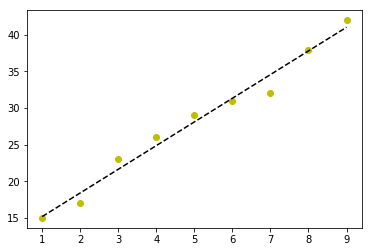

In [16]:
matplotlib.pyplot.plot(x_data,y_data, 'yo', x_data,fitFunction(x_data), '--k')